# Dimensionality Reduction

In this lesson, we are going to apply PCA and LDA to the dataset and visualize them in two dimension

In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('pulsar_stars.csv')
print(df.columns)
df.describe()

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [3]:
from sklearn.preprocessing import StandardScaler
features = [' Mean of the integrated profile', ' Standard deviation of the integrated profile', ' Excess kurtosis of the integrated profile', ' Skewness of the integrated profile'
           ,' Mean of the DM-SNR curve',' Standard deviation of the DM-SNR curve',' Excess kurtosis of the DM-SNR curve',' Skewness of the DM-SNR curve']

# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target_class']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

pd.DataFrame(data=x, columns = features).head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,1.149317,1.334832,-0.669570,-0.400459,-0.319440,-0.370625,-0.072798,-0.287438
1,-0.334168,1.802265,-0.011785,-0.370535,-0.371102,-0.588924,0.504427,0.211581
2,-0.314372,-1.053322,-0.145233,-0.116593,-0.322107,-0.235328,-0.125996,-0.391373
3,1.000694,1.553254,-0.513409,-0.390178,-0.304404,-0.275666,-0.312265,-0.481300
4,-0.871402,-0.858879,0.115609,-0.104866,-0.388010,-0.763111,1.324026,1.386794


## Performing 2D Principal Component Analysis

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,-1.278849,-1.273133
1,-1.020553,-0.201162
2,0.188289,0.432114
3,-1.015466,-1.469881
4,-0.822626,2.123651


In [5]:
finalDf = pd.concat([principalDf, df[['target_class']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,target_class
0,-1.278849,-1.273133,0
1,-1.020553,-0.201162,0
2,0.188289,0.432114,0
3,-1.015466,-1.469881,0
4,-0.822626,2.123651,0


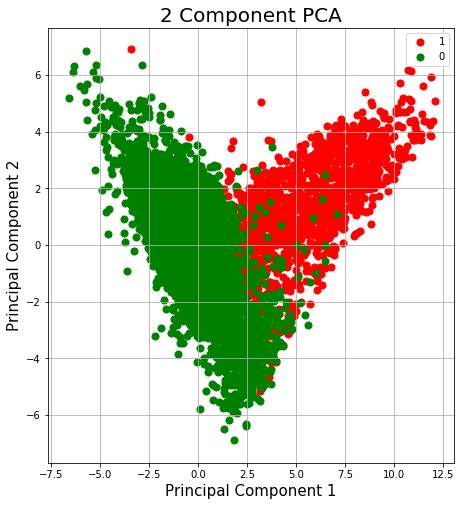

In [6]:
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(1,2,1) 
ax1.set_xlabel('Principal Component 1', fontsize = 15)
ax1.set_ylabel('Principal Component 2', fontsize = 15)
ax1.set_title('2 Component PCA', fontsize = 20)


targets = [1, 0]
colors = 'rgb'
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target_class'] == target
    ax1.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax1.legend(targets)
ax1.grid()

### Using K-Means after PCA

In [7]:
km2 = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

km2.fit(principalDf)
y_kmeans = km2.fit_predict(principalDf)

Index(['principal component 1', 'principal component 2'], dtype='object')


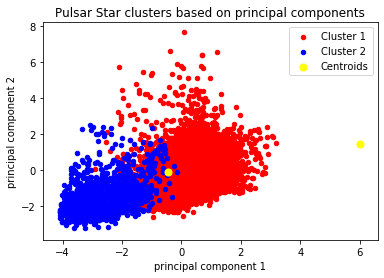

In [8]:
#Visualising the clusters by selecting only column 0 and 1
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 20, c = 'blue', label = 'Cluster 2')

#Plotting the centroids of the clusters
plt.scatter(km2.cluster_centers_[:, 0], km2.cluster_centers_[:,1], s = 50, c = 'yellow', label = 'Centroids')
print (principalDf.columns)
plt.title('Pulsar Star clusters based on principal components')
plt.xlabel(principalDf.columns[0])
plt.ylabel(principalDf.columns[1])

plt.legend()
plt.show()

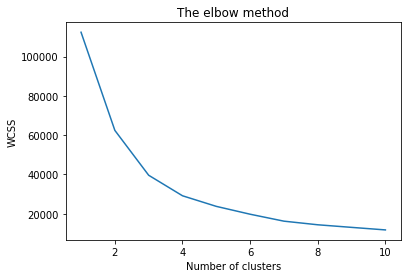

In [9]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

# Trying kmeans for k=1 to k=10
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(principalDf)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

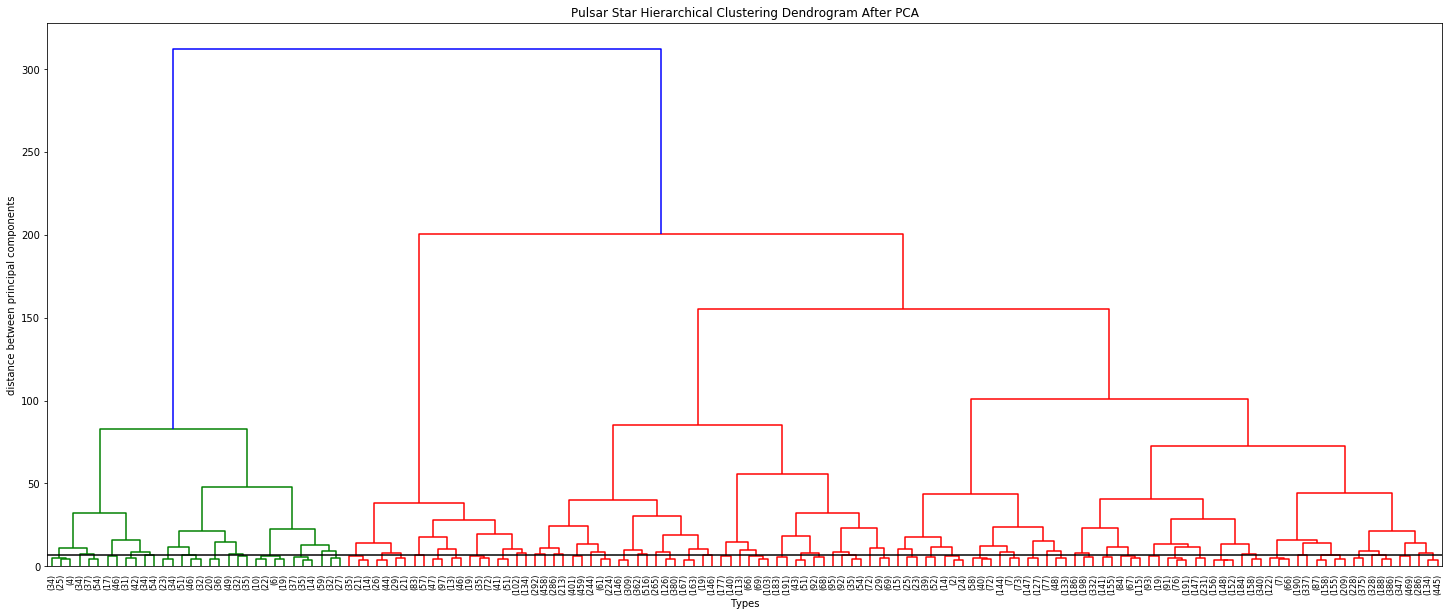

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage

# generate the linkage matrix
Z = linkage(principalDf, 'ward')

# set cut-off to 150 cluster merges
max_d = 7.08                # max_d as in max_distance

plt.figure(figsize=(25, 10))
plt.title('Pulsar Star Hierarchical Clustering Dendrogram After PCA')
plt.xlabel('Types')
plt.ylabel('distance between principal components')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=150,                  # Try changing values of p
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
)
plt.axhline(y=max_d, c='k')
plt.show()

In [11]:
principalDf

,principal component 1,principal component 2
0,-1.278849,-1.273133
1,-1.020553,-0.201162
2,0.188289,0.432114
3,-1.015466,-1.469881
4,-0.822626,2.123651
5,-0.451877,0.781591
6,-2.882722,2.285347
7,-1.458360,1.007412
8,-0.670243,-0.060251
9,0.305085,0.298898


In [12]:
finalDFArray = np.array(principalDf)

In [13]:
finalDFArray

array([[-1.27884879, -1.27313333],
       [-1.02055347, -0.20116189],
       [ 0.18828859,  0.43211417],
       ...,
       [ 0.68183395, -2.6861702 ],
       [-1.10391246, -0.11650828],
       [ 3.71252289, -4.90385741]])

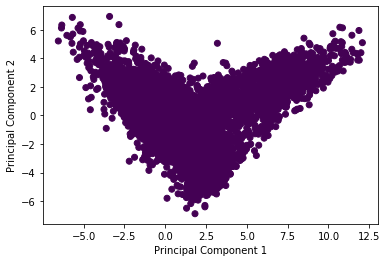

In [14]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(finalDFArray)

# cluster the data
dbscan = DBSCAN(eps=1, min_samples = 5)#increase min sample
clusters = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
plt.scatter(finalDFArray[:, 0], finalDFArray[:, 1], c=clusters,)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.show()

In [15]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print(f'Number of clusters = {n_clusters_}')
print(f'Number of noise sample = {n_noise_}')

Number of clusters = 1
Number of noise sample = 0


## Explained Variance
Together, the first two principal components contain 78.48% of the information. The first principal component contains 51.67% of the variance and the second principal component contains 26.80% of the variance. The third and fourth principal component contained the rest of the variance of the dataset.

In [30]:
print(pca.explained_variance_ratio_)

print(pca.explained_variance_ratio_.sum())

[0.51675584 0.26807564]
0.7848314751537135


## Performing 2D Linear Discriminant Analysis

In [38]:
# What is ravel - convert 2D array with 1 column into 1D array.
print(y.shape)
print(np.ravel(y).shape)
print(x.shape)
print(x.shape)
print(np.ravel(y))

(17898, 1)
(17898,)
(17898, 8)
(17898, 8)
[0 0 0 ... 0 0 0]


In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)  
lda_result = lda.fit_transform(x, np.ravel(y))  

ldaDf = pd.DataFrame(data = lda_result
             , columns = ['Linear Discriminant 1'])


C:\Users\Iris\Anaconda3\envs\sa48\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(8, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\Iris\Anaconda3\envs\sa48\lib\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000227B958B9B0>]],
      dtype=object)

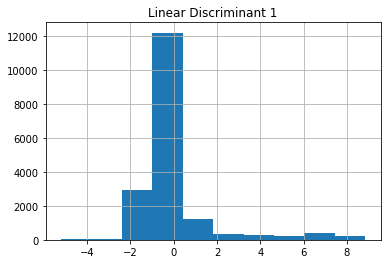

In [40]:
ldaDf.hist()

In [12]:
finalLdaDf = pd.concat([ldaDf, df[['target_class']]], axis = 1)
finalLdaDf.head(5)

,Linear Discriminant 1,target_class
0,-1.241411,0
1,-0.170368,0
2,-0.501111,0
3,-0.790450,0
4,-0.225713,0


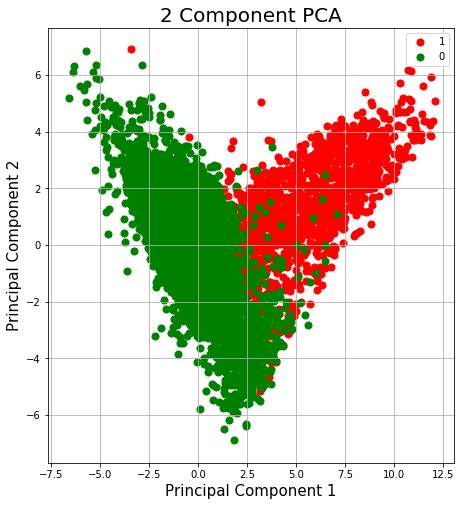

In [36]:
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(1,2,1) 
ax1.set_xlabel('Principal Component 1', fontsize = 15)
ax1.set_ylabel('Principal Component 2', fontsize = 15)
ax1.set_title('2 Component PCA', fontsize = 20)


targets = [1, 0]
colors = 'rgb'
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target_class'] == target
    ax1.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax1.legend(targets)
ax1.grid()

LDA is not very relevant in the dataset as we have *two* target classes. LDA is more relevant for the dataset where the number of features is of a higher concern.